In [1]:
import squidpy
import pylab as pl
%matplotlib inline

mock1 = squidpy.Mock('mock1')
mock2 = squidpy.Mock('mock2')
instruments = squidpy.InstrumentList(mock1, mock2)

In [2]:
instruments

mock1,"['wave', 'time', 'voltage']"
mock2,"['wave', 'time', 'voltage']"


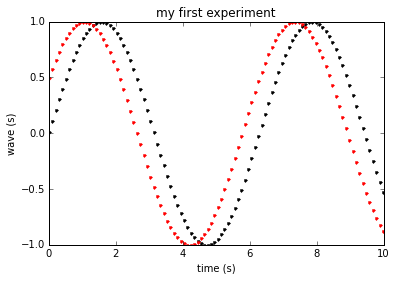

In [3]:
title = 'my first experiment'
test = squidpy.Experiment(title, instruments.all())
test.plot.add_line('mock1.time', 'mock1.wave', '.k')
test.plot.add_line('mock1.time', 'mock2.wave', '.r')
mock1.reset_timer()
test.watch(10)